# Data

[source](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data)

In [2]:
import pandas as pd
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo.info()
demo
#Notice how the date is an integer, not a string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         15341 non-null  int64  
 1   cloud_cover  14938 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


,date,cloud_cover
0,19790101,2.0
1,19790102,6.0
2,19790103,5.0
3,19790104,8.0
4,19790105,6.0
...,...,...
15336,20201227,1.0
15337,20201228,7.0
15338,20201229,7.0
15339,20201230,6.0


In [3]:
pd.to_datetime(demo['date'])

# What happened? What did we get?

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

- Pandas was confused and tried to interpret the integer dates as Unix times.

- Unix times are a way of expressing date and time with just numbers. However, the earliest possible unix date is January 01, 1970.

- As you can see above, it assigned the date of 1970-01-01 to every date. And then used the integer date as the number of milliseconds AFTER 12:00AM on 01/01/1970.

- The main thing to notice here is: This is not what we wanted!! It is essential that you check the results of anything you ask Python to do to make sure it is working how you expect it to! If not, you need to investigate further and figure out what the issue is.

- In this case, python needs a little help from us humans! Let's examine our original date format and see if we can decipher it!

In [4]:
## displaying random sample
demo['date'].sample(n=10).sort_index()

1123     19820128
3228     19871103
9652     20050605
10357    20070511
11533    20100730
11925    20110826
12471    20130222
12781    20131229
13885    20170106
14490    20180903
Name: date, dtype: int64

In [5]:
pd.to_datetime(demo['date'], format='%Y%m%d')

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

# Handling pd.to_datetime Errors

[source](https://data.baltimorecity.gov/search?q=crime%20data)

In [7]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv"
demo = pd.read_csv(url)
demo.info()
demo.head()
# crine date time is an object?!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527817 entries, 0 to 527816
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CrimeDateTime  527817 non-null  object 
 1   Description    527817 non-null  object 
 2   District       526036 non-null  object 
 3   Latitude       526913 non-null  float64
 4   Longitude      526913 non-null  float64
dtypes: float64(2), object(3)
memory usage: 20.1+ MB


,CrimeDateTime,Description,District,Latitude,Longitude
0,2022/07/09 09:30:00+00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022/07/09 16:00:00+00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022/07/09 00:34:28+00,SHOOTING,SOUTHWEST,39.2884,-76.6569
3,2022/07/09 00:34:28+00,SHOOTING,SOUTHWEST,39.2884,-76.6569
4,2022/07/09 18:00:00+00,COMMON ASSAULT,NORTHEAST,39.3188,-76.5872


In [8]:
# This will give an error
pd.to_datetime(demo['CrimeDateTime'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1202-05-22 10:56:02 present at position 522867

In [9]:
#what is causing the problem?
try:
        display(pd.to_datetime(demo['CrimeDateTime']))
except Exception as e:
        print(e)

Out of bounds nanosecond timestamp: 1202-05-22 10:56:02 present at position 522867


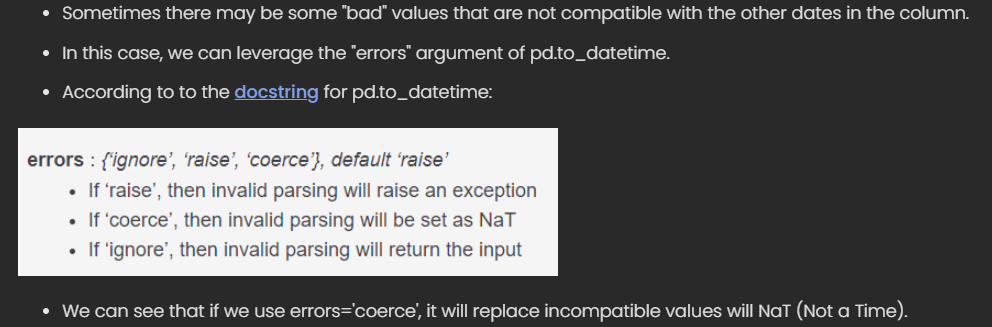

In [10]:
demo['CrimeDateTime'] = pd.to_datetime(demo['CrimeDateTime'], errors='coerce')
demo['CrimeDateTime'].isna().sum()

1

In [11]:
demo = demo.dropna(subset=['CrimeDateTime'])
demo.info()
demo.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527816 entries, 0 to 527816
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   CrimeDateTime  527816 non-null  datetime64[ns, UTC]
 1   Description    527816 non-null  object             
 2   District       526035 non-null  object             
 3   Latitude       526912 non-null  float64            
 4   Longitude      526912 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 24.2+ MB


,CrimeDateTime,Description,District,Latitude,Longitude
0,2022-07-09 09:30:00+00:00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022-07-09 16:00:00+00:00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
3,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
4,2022-07-09 18:00:00+00:00,COMMON ASSAULT,NORTHEAST,39.3188,-76.5872


In [12]:
pd.to_datetime(demo['CrimeDateTime'])

0        2022-07-09 09:30:00+00:00
1        2022-07-09 16:00:00+00:00
2        2022-07-09 00:34:28+00:00
3        2022-07-09 00:34:28+00:00
4        2022-07-09 18:00:00+00:00
                    ...           
527812   2013-07-31 17:45:00+00:00
527813   2013-07-31 14:15:00+00:00
527814   2013-07-31 21:00:00+00:00
527815   2013-07-31 17:00:00+00:00
527816   2013-07-31 11:40:00+00:00
Name: CrimeDateTime, Length: 527816, dtype: datetime64[ns, UTC]